In [1]:
import json
import cv2
import matplotlib.pyplot as plt
import os

In [87]:
# Images with OCR results
files = os.listdir('./texts_coordinates')
uids_with_texts_coos = [f.split('.')[0] for f in files]
print('Nb images with OCR res:', len(uids_with_texts_coos))

# Images with end results to evaluate E2E algo
with open('uids_items.json', 'r') as f:
    uids_items = json.load(f)
uids_with_items = [item['uid'] for item in uids_items]
print('Nb images with end res:', len(uids_with_items))

# Images with word labels
files = os.listdir('./texts_boxes_labels')
uids_with_labels = [f.split('.')[0] for f in files]
print('Nb images with labels:', len(uids_with_labels))

# For training
print('For training (including evaluation):', len([uid for uid in uids_with_labels if uid not in uids_with_items]))

# For eval
print('For validation:', len([uid for uid in uids_with_labels if uid in uids_with_items]))

Nb images with OCR res: 215
Nb images with end res: 155
Nb images with labels: 98
For training (including evaluation): 60
For validation: 38


In [86]:
# Images with word labels
files = os.listdir('./texts_boxes_labels')
uids_with_labels = [f.split('.')[0] for f in files]
print('Nb images with labels:', len(uids_with_labels))

# To label
# With word texts coos but without labels and without E2E results
uids_texts_coos_no_labels = [uid for uid in uids_with_texts_coos if uid not in uids_with_labels + uids_with_items]
uids_texts_coos_no_labels.remove('')
print(len(uids_texts_coos_no_labels))

uid = uids_texts_coos_no_labels[0]
print(f'{uid}.json')

Nb images with labels: 98
0


IndexError: list index out of range

In [82]:
labels = 

142 142


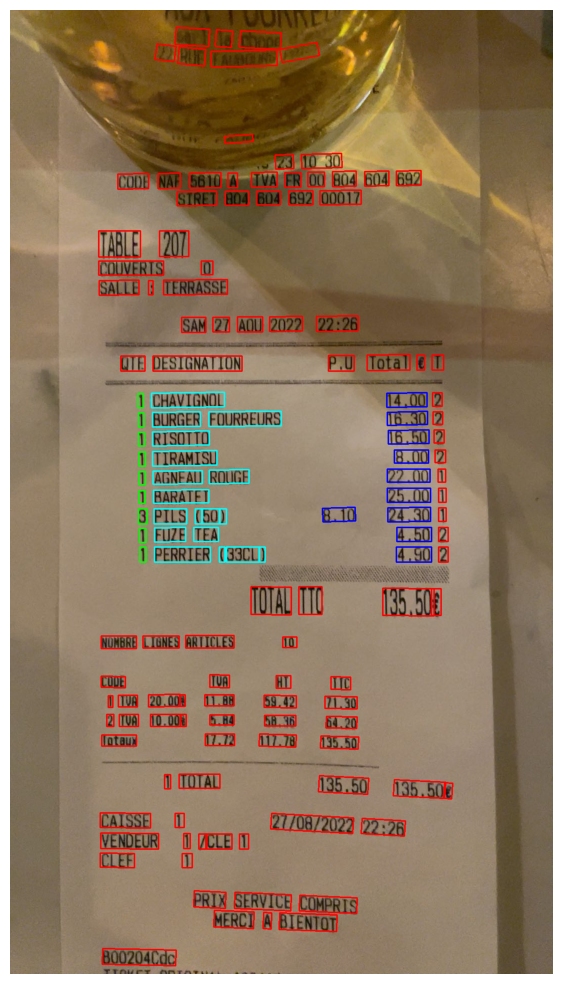

In [83]:
with open('texts_coordinates/' + uid + '.json', 'r') as f:
    texts_coos = json.load(f)
print(len(labels), len(texts_coos))

if len(labels) != len(texts_coos):
    raise RuntimeError('Mismatch lengths')

labelled_dataset = {
    'texts': [element['text'] for element in texts_coos],
    'raw_boxes': [element['coo'] for element in texts_coos],
    'labels': labels
}

image = cv2.imread(f'cuentas/{uid}.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

color_mapping = {
    'element_quantity': (0, 255, 0),  # green
    'element_name': (0, 255, 255),  # cyan
    'element_price': (0, 0, 255),  # blue
    'other': (255, 0, 0),  # red
}

for text, box, label in zip(labelled_dataset['texts'], labelled_dataset['raw_boxes'], labelled_dataset['labels']):
    color = color_mapping.get(label)
    cv2.line(image, box[0], box[1], color, 2)
    cv2.line(image, box[1], box[2], color, 2)
    cv2.line(image, box[2], box[3], color, 2)
    cv2.line(image, box[3], box[0], color, 2)

plt.figure(figsize=(7, 14))
# plt.figure(figsize=(14, 21))
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [84]:
with open(f'texts_boxes_labels/{uid}.json', 'w') as f:
    json.dump(labelled_dataset, f)